<h4>Overview</h4>

The objective in this dataset was to study the detection and prevention of heart disease. The dataset was collected through annual telephone surveys conducted within the US.The data collected is from 2020 through February 2022.

The original dataset contained nearly 300 variables but this cleaner version of the data set has was reduced to 18 features. A summary of the data will first be performed then exploratory data analysis.

Link to the original Kaggle dataset: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing

In [2]:
file_path = "../data/raw/heart_2020_cleaned.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
#count of any null values
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

We see this dataset has dealth with all null values.

HeartDisease - Has the respondent ever reported having coronary heart disease or myocardial infarction? <br>
BMI - Body Mass Index <br>
Smoking - Has the respondent ever smoked at least 100 cigarettes?<br>
AlcoholDrinking - For adult males, having more than 14 drinks per week. For adult females, having more than 7 drinks per week<br>
Stroke - Ever had a stroke?<br>
PhysicalHealth - How many physical illnesses and injuries in the last 30 days?<br>
MentalHealth - How many days in the last 30 days was mental health not good?<br>
DiffWalking - Does the respondent have diffculty walking or climbing stairs?<br>
Sex - Male or female?<br>
AgeCategory - Fourteen-level age category<br>
Race - Imputed race/ethnicity<br>
Diabetic - Does the respondent have or has ever been informed of having diabetes?<br>
PhysicalActivity - Has the respondent reported physical activity in the last 30 days?<br>
GenHealth - Respondent personal rating of health<br>
SleepTime - Average hours of sleep in a 24-hour period<br>
Asthma - Has the respondent ever had or been informed of having asthma?<br>
KidneyDisease - Has the respondent ever had or been informed of having kidney disease?<br>
SkinCancer - Has the respondent ever had or been informed of having skin cancer?<br>


In [5]:
#data set has near 320,000 observations with 18 features
df.shape

(319795, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Most of features of this dataset are categorical with only four features being numerical. Also the relationship of each feature to each other feature may have to be looked at individually. For example, the relationship between BMI, and heart disease or diabetic condition may have strong correlation while physical activity for the last 30 days may not provide much insight for someone who has difficulty walking for years or decades. Depending on the prediction variable and what we want to focus on, we could select and group certain features to build prediction models on. For now, I'll continue exploring the data.

In [8]:
#A characteristic all respondents will have is age group.
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

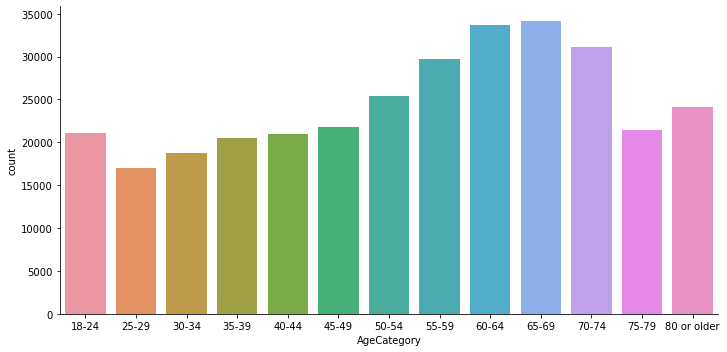

In [9]:
#We see there is no group under the age of 18.
order = sorted(df['AgeCategory'].unique())
sns.catplot(data=df, x = 'AgeCategory', kind='count', order=order, aspect=2)
plt.show()

The group that responded the most is the 65-69 age group followed by the 60-64 age group. This may be because the population at this age group is larger than the other groups, or this age group is more likely to answer the telephone survey.

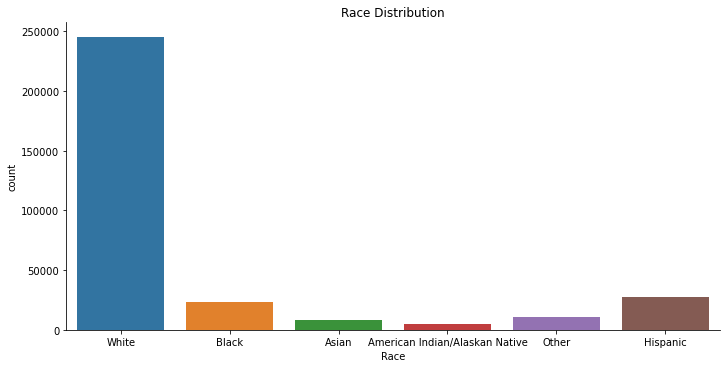

In [14]:
sns.catplot(data=df, x='Race', kind='count', aspect=2).set(title='Race Distribution')
plt.show()

In [38]:
#Plotting physical injuries and poor mental health within the last 30 days by age group.
avg_physical_byAge = df[['AgeCategory','PhysicalHealth', 'MentalHealth']].groupby('AgeCategory').mean().reset_index()
avg_physical_byAge.head()

,AgeCategory,PhysicalHealth,MentalHealth
0,18-24,1.698965,6.152535
1,25-29,1.802241,5.729106
2,30-34,2.018344,5.292540
3,35-39,2.241606,5.049781
4,40-44,2.574836,4.675188


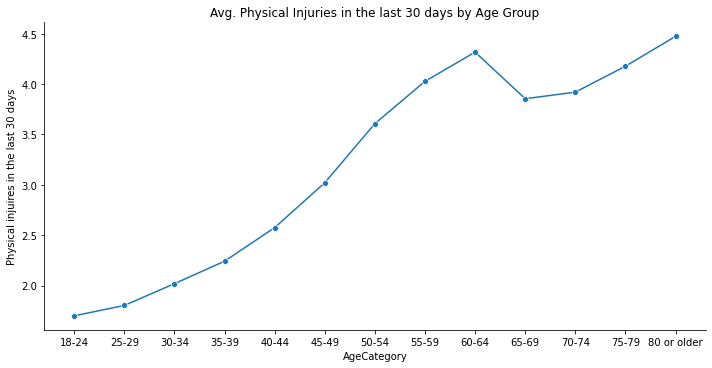

In [55]:
sns.relplot(data=avg_physical_byAge, x= 'AgeCategory', y = 'PhysicalHealth', aspect = 2, kind='line', marker='o').set(title = 'Avg. Physical Injuries in the last 30 days by Age Group').set_ylabels('Physical injuires in the last 30 days')
plt.show()

The graph above shows that older age groups sustain more physical injuries up until the 60-64 age group then a sudden decrease occurs and then climbs again.

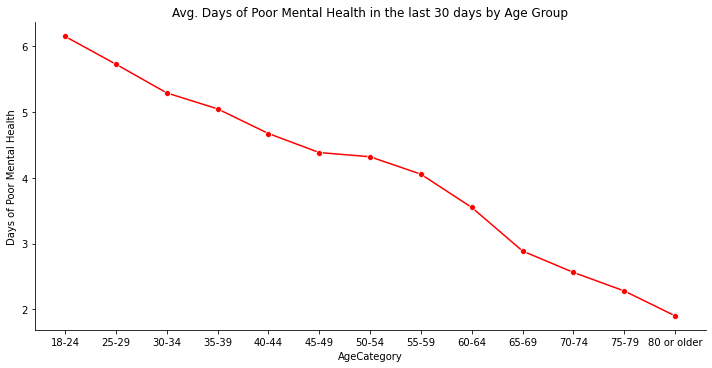

In [53]:
sns.relplot(data=avg_physical_byAge, x= 'AgeCategory', y = 'MentalHealth', aspect = 2, kind='line', marker='o', color='red').set(title = 'Avg. Days of Poor Mental Health in the last 30 days by Age Group').set_ylabels('Days of Poor Mental Health')
plt.show()

The younger age groups report more days of poor mental health but this steady declines with higher age groups.

In [67]:
#Comparing the other diseases against each other.
diseases = ['HeartDisease', 'Stroke', 'DiffWalking', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer']

In [98]:
disease_count = list()
for disease in df[diseases].columns:
    disease_count.append(df[disease].value_counts()['Yes'])

In [103]:
df_disease_count = pd.DataFrame(disease_count, index=diseases, columns=['Yes']).reset_index()

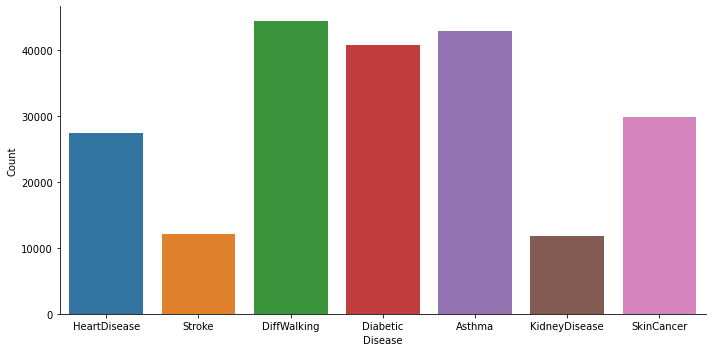

In [109]:
disease_bar_plot = sns.catplot(data=df_disease_count, x='index', y= 'Yes', kind='bar', aspect=2)
disease_bar_plot.set_xlabels('Disease')
disease_bar_plot.set_ylabels('Count')
plt.show()

From this pool of respondonts, we see that difficulty walking, diabetes, asthma, and skin cancer occur more than heart disease.

There are multiple independent variables we could select to predict the liklihood heart disease, so we'll just start with something. My first group will include BMI, AlcoholDrinking, PhysicalHealth, Sleeptime as those are characteristics that could be changed in the short term (1-3 months). 

In [46]:
#Setting the prediction variable to Heart Disease
y = df['HeartDisease']
#Transform the y dataframe to a numerical representation
y = pd.get_dummies(y)['Yes']

In [52]:
shortTerm = ['BMI', 'AlcoholDrinking', 'PhysicalHealth', 'SleepTime']
shortTerm_df = df[shortTerm]
shortTerm_df.head(3)

,BMI,AlcoholDrinking,PhysicalHealth,SleepTime
0,16.60,No,3.0,5.0
1,20.34,No,0.0,7.0
2,26.58,No,20.0,8.0


In [53]:
#Transform the AlcoholDrinking to have a numerical representation. A "1" will represent "yes" and a "0" will present "no".
shortTerm_df = pd.get_dummies(shortTerm_df).drop('AlcoholDrinking_No', axis=1)

In [54]:
shortTerm_df.head(3)

,BMI,PhysicalHealth,SleepTime,AlcoholDrinking_Yes
0,16.60,3.0,5.0,0
1,20.34,0.0,7.0,0
2,26.58,20.0,8.0,0


In [55]:
#Create the training and test sets with the shortTerm dataframe as the independent variables and heart disease as the dependent variable.
X_train, X_test, y_train, y_test = train_test_split(shortTerm_df, y)

In [59]:
#perform logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(X_train, y_train)
print(accuracy_score(clf.predict(X_test), y_test))

0.9138826001576005
